#T1-21. 구간 분할 Expected Question

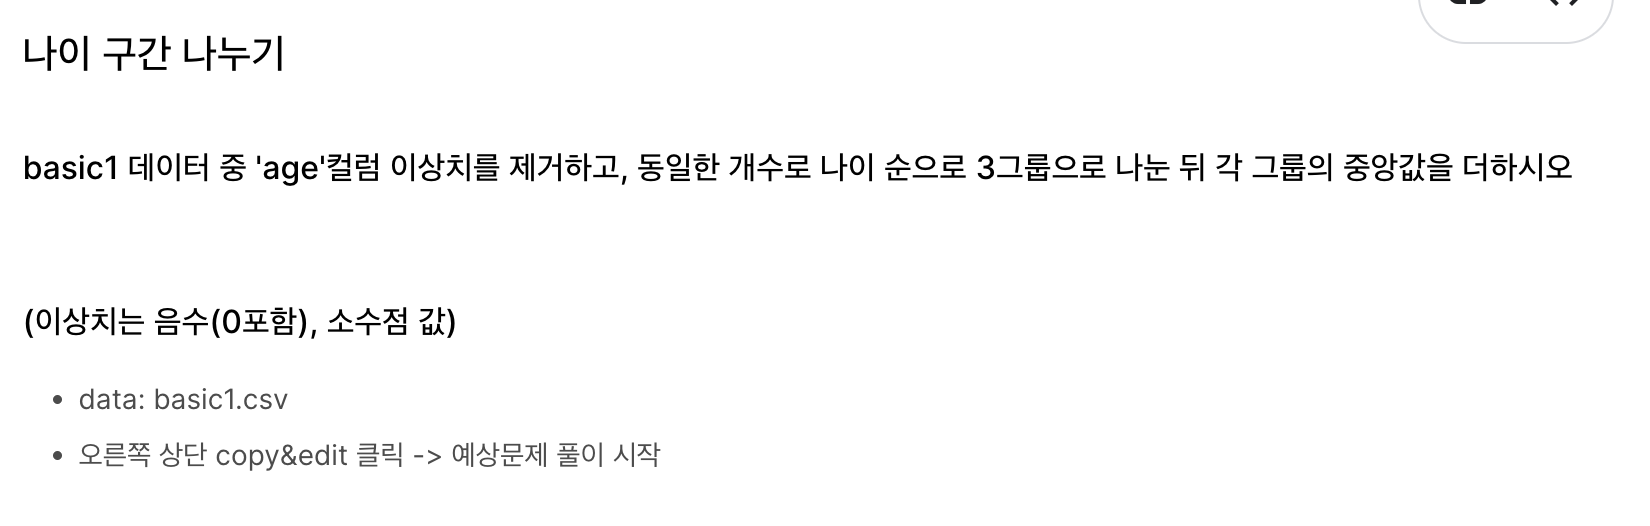

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/basic1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB


In [6]:
#음수(0포함) 이상치 제거
df = df[df['age']>0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      96 non-null     object 
 1   age     96 non-null     float64
 2   city    96 non-null     object 
 3   f1      65 non-null     float64
 4   f2      96 non-null     int64  
 5   f3      5 non-null      object 
 6   f4      96 non-null     object 
 7   f5      96 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.8+ KB


In [8]:
#소수점 값 제거
df = df[~(df['age'] - np.floor(df['age'])!=0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      90 non-null     object 
 1   age     90 non-null     float64
 2   city    90 non-null     object 
 3   f1      60 non-null     float64
 4   f2      90 non-null     int64  
 5   f3      5 non-null      object 
 6   f4      90 non-null     object 
 7   f5      90 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.3+ KB


In [9]:
pd.qcut(df['age'], q=3)

0      (0.999, 38.667]
1      (0.999, 38.667]
2      (0.999, 38.667]
3      (73.333, 100.0]
4      (0.999, 38.667]
            ...       
95     (73.333, 100.0]
96     (73.333, 100.0]
97    (38.667, 73.333]
98     (0.999, 38.667]
99    (38.667, 73.333]
Name: age, Length: 90, dtype: category
Categories (3, interval[float64, right]): [(0.999, 38.667] < (38.667, 73.333] < (73.333, 100.0]]

In [10]:
df['range'] = pd.qcut(df['age'], q=3, labels=['group1','group2','group3'])
df

,id,age,city,f1,f2,f3,f4,f5,range
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,group1
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,group1
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,group1
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,group3
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,group1
...,...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078,group3
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373,group3
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,group2
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,group1


In [14]:
# 동일한 갯수로 나눔을 확인
df['range'].value_counts()

group1    30
group2    30
group3    30
Name: range, dtype: int64

In [15]:
g1_med = df[df['range']=='group1']['age'].median()
g2_med = df[df['range']=='group2']['age'].median()
g3_med = df[df['range']=='group3']['age'].median()

answer = g1_med + g2_med + g3_med
print(answer)

165.0
